# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 11th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from skimage.transform import resize
from skimage.exposure import histogram
from skimage import img_as_float
from skimage.transform import rescale
from skimage.filters import gaussian
from skimage.filters import median
from skimage.color import rgba2rgb
from skimage import filters
from skimage import feature
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [2]:
# Auxiliar functions

def showImage(figsize, images, titles):
    
    fig=plt.figure(figsize=figsize)

    for image in range(len(images)):
        fig.add_subplot(1,len(images), image+1)
        plt.title(titles[image])
        plt.imshow(images[image], cmap='gray')
        plt.axis('off')

    plt.show()


### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

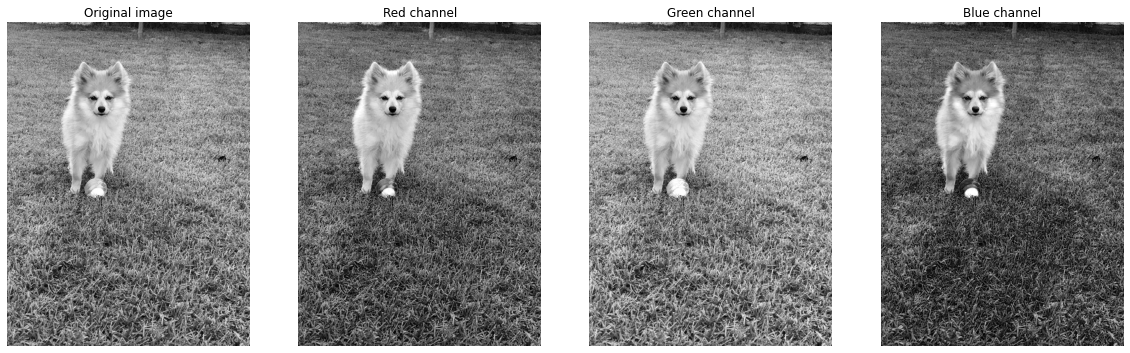

Original rocki shape  (1024, 768) Original rocki type  float64
Red channel rocki shape  (1024, 768) Red channel rocki type  uint8
Green channel rocki shape  (1024, 768) Green channel rocki type  uint8
Blue channel rocki shape  (1024, 768) Blue channel rocki type  uint8


In [3]:
# your solution

image_rocki=io.imread('./images_notebook/rocki.jpeg')
image_rocki_gray = rgb2gray(image_rocki)
#Visualize it

# RGB layer 1 is Red channel
image_rocki_red_channel = image_rocki[:,:,0] 

# RGB layer 2 is Green channel
image_rocki_green_channel = image_rocki[:,:,1]

# RGB layer 3 is Blue channel
image_rocki_blue_channel = image_rocki[:,:,2]

showImage((20,20), [image_rocki_gray, image_rocki_red_channel, image_rocki_green_channel, image_rocki_blue_channel], ['Original image', 'Red channel', 'Green channel', 'Blue channel'])

print('Original rocki shape ',image_rocki_gray.shape,'Original rocki type ', image_rocki_gray.dtype)
print('Red channel rocki shape ',image_rocki_red_channel.shape,'Red channel rocki type ', image_rocki_red_channel.dtype)
print('Green channel rocki shape ',image_rocki_green_channel.shape,'Green channel rocki type ', image_rocki_green_channel.dtype)
print('Blue channel rocki shape ',image_rocki_blue_channel.shape,'Blue channel rocki type ', image_rocki_blue_channel.dtype)

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

> The histogram of an image is a graphical representation of the number of pixels in the image according to their intensities, i.e., the pixels are grouped according to the values they can take.

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?
  
  > The values can be grouped into groups such as 4, 16, 32, 256. Thus, in 4, 16, 32, 256 bins, each bin represents a specific range of intensity values.

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

  > We should convert the image to float64 format to facilitate the calculation of the histogram.

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

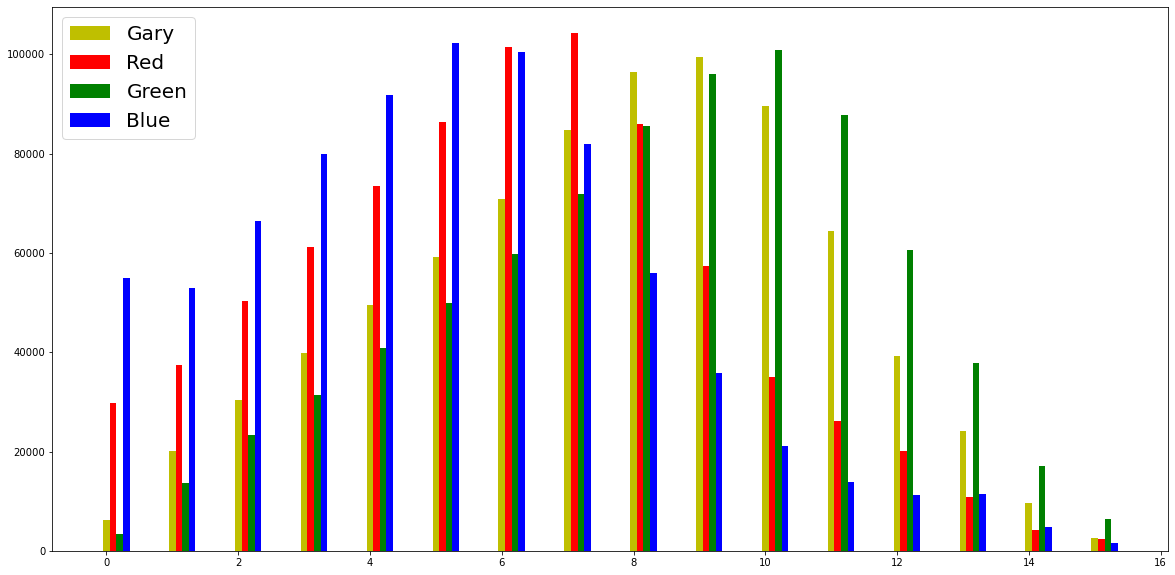

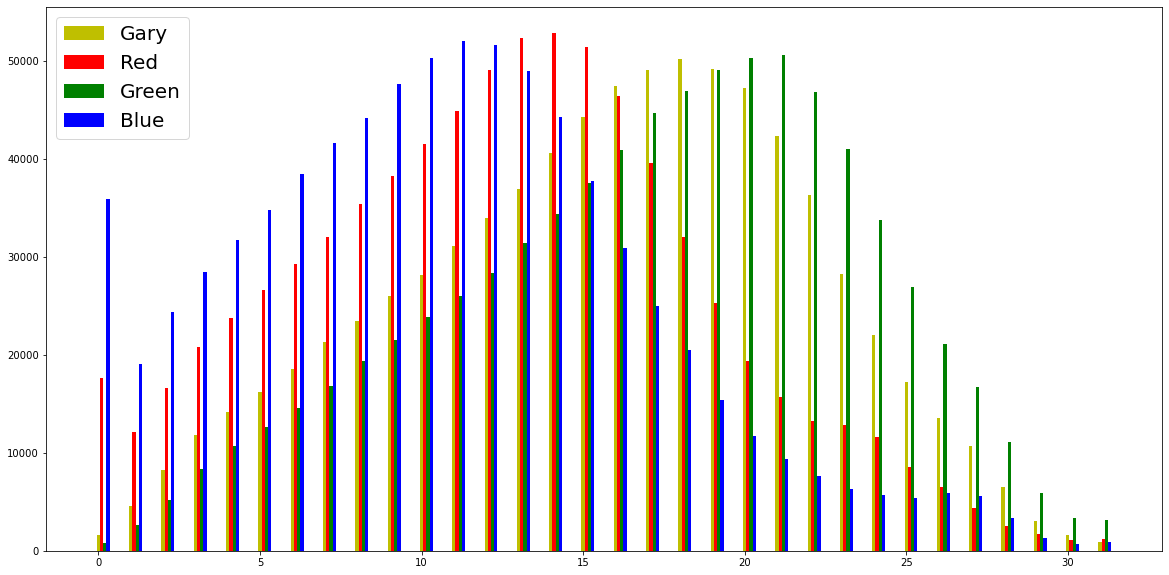

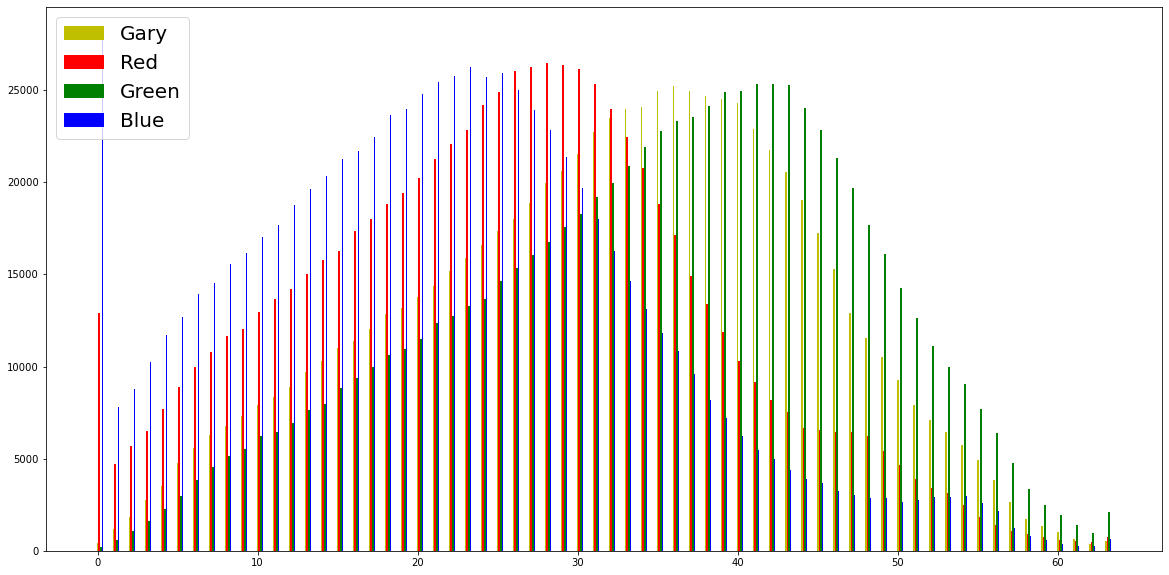

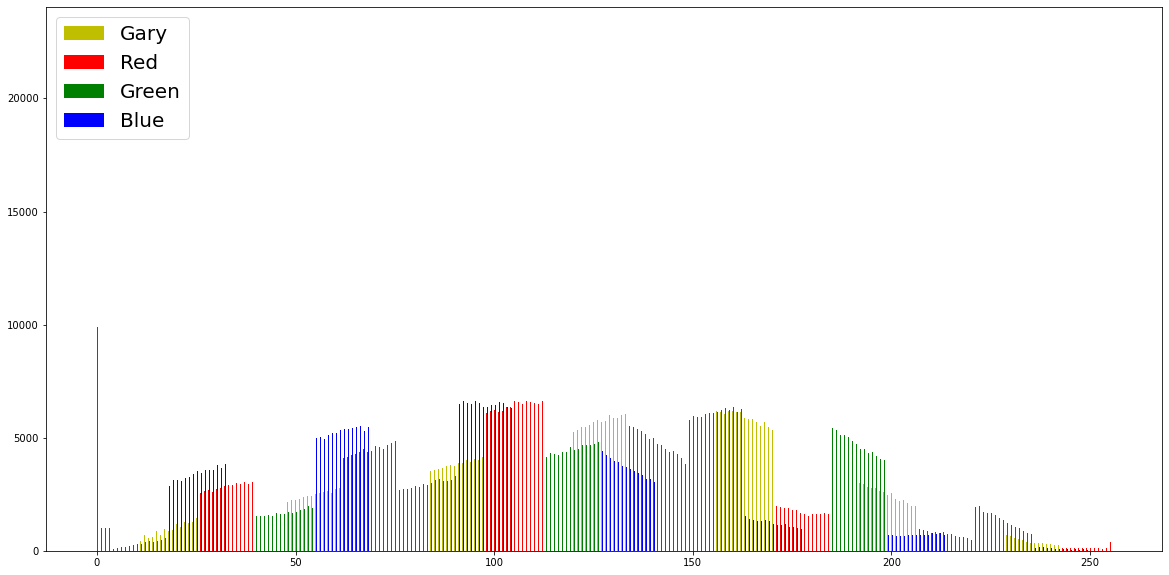

In [4]:
# your solution

def im_hist(im,  nbins=8):
    
    for number in nbins:
        # histogram with nbins
        hst_gray, bins_gray = histogram(img_as_float(image_rocki_gray), nbins=number)
        hst_r, bins_r = histogram(img_as_float(image_rocki[:,:,0]), nbins=number)
        hst_g, bins_g = histogram(img_as_float(image_rocki[:,:,1]), nbins=number)
        hst_b, bins_b = histogram(img_as_float(image_rocki[:,:,2]), nbins=number)

        ind = np.arange(number)
        fig = plt.figure(figsize=(20,10))
        
        #Visualize it
        cl_gray = plt.bar(ind, hst_gray, 0.1, color='y')
        cl_r = plt.bar(ind+.1, hst_r, 0.1, color='r')
        cl_g = plt.bar(ind+.2, hst_g,0.1, color='g')
        cl_b = plt.bar(ind+.3, hst_b,0.1, color='b')
        
        plt.legend((cl_gray[0], cl_r[0], cl_g[0], cl_b[0]), ('Gary','Red','Green','Blue'), loc=2, prop={'size': 20})
        plt.show()
        
im_hist(image_rocki_gray, [16, 32, 64, 256])

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

> The type of the mask are important. You can see in the results that we applied a horizontal mask and a vertical mask, and we smoothed the image horizontally and smoothed vertically. If we apply an n x n matrix mask, we get a fully smooth mask.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


In [5]:
# your solution

image_rocki = io.imread('./images_notebook/rocki.jpeg')
image_rocki = resize(image_rocki, (256, 256))

# image rgb to image gray
rocki_gray = rgb2gray(image_rocki)

# Convolve rocki_gray with a horizhontal mask
mask_h1d = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
mask_h1d = mask_h1d/np.sum(mask_h1d)
rocki_smooth = convolve(rocki_gray, mask_h1d, mode='constant', cval=0.0)

# Convolve rocki_gray with a transposed version of the mask
mask_h1dT = mask_h1d.T
rocki_smoothT = convolve(rocki_gray, mask_h1dT, mode='constant', cval=0.0)

# Convolve rocki_gray with a uniform two-dimensional mask of dimensions 15x15 with all values set to 1
two_dimensional = np.ones((15, 15))
two_dimensional = two_dimensional/np.sum(two_dimensional)
rocki_smooth2D = convolve(rocki_gray, two_dimensional, mode='constant', cval=0.0)


b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


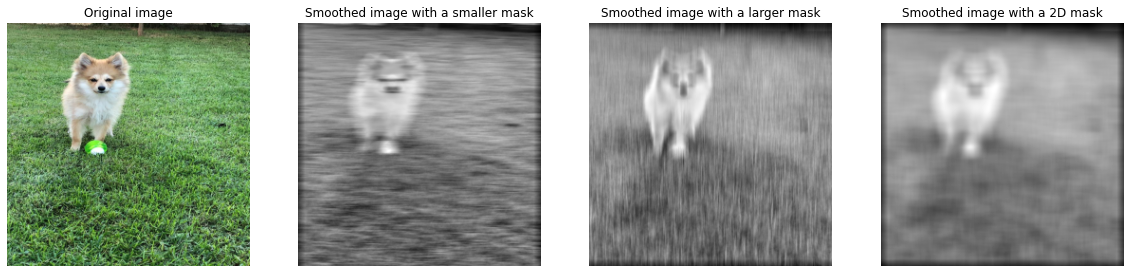

In [6]:
#your solution
showImage((20,20), [image_rocki, rocki_smooth, rocki_smoothT, rocki_smooth2D], ['Original image', 'Smoothed image with a smaller mask', 'Smoothed image with a larger mask', 'Smoothed image with a 2D mask'])

c) Can we convolve a color (RGB) image? 

> Yes. We can convolve 3 channels simultaneously.

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


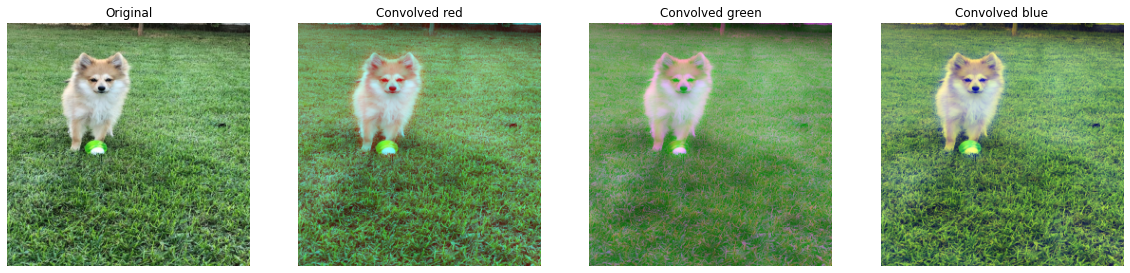

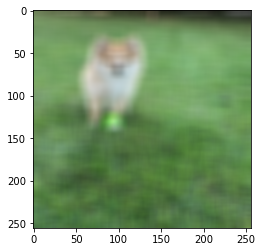

In [7]:
#your solution
def conv_coor(image, mask, channel):
    mask = mask/np.sum(mask)
    image_rgb = np.copy(image)
    image_rgb[:,:,channel] = convolve(image[:,:,channel], mask)
    return image_rgb

# 15x15 uniform mask   
mask=np.ones((15,15))

# apply conv_coor a 3-channel filter
channel_r = conv_coor(image_rocki, mask, 0)
channel_g = conv_coor(image_rocki, mask, 1)
channel_b = conv_coor(image_rocki, mask, 2)

showImage((20,20), [image_rocki, channel_r, channel_g, channel_b], ['Original', 'Convolved red', 'Convolved green', 'Convolved blue'])

image = np.zeros((256, 256, 3), dtype=np.float64)

image[:,:,0] = channel_r[:,:,0]
image[:,:,1] = channel_g[:,:,1]
image[:,:,2] = channel_b[:,:,2]

plt.imshow(image, cmap='gray')

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.

> From the results, what we can notice is the difference in the number of pixels per grayscale, the second histogram looks softer and not as abruptly changed as the first. This tells us which images are smoother because they have similar colors, so we can get a smooth histogram.


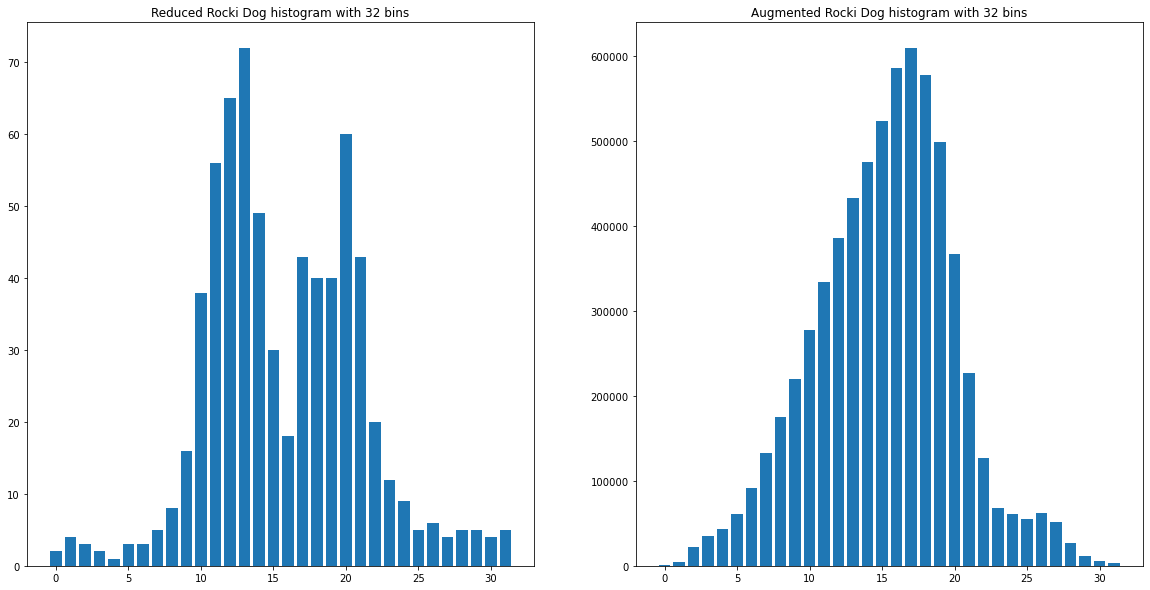

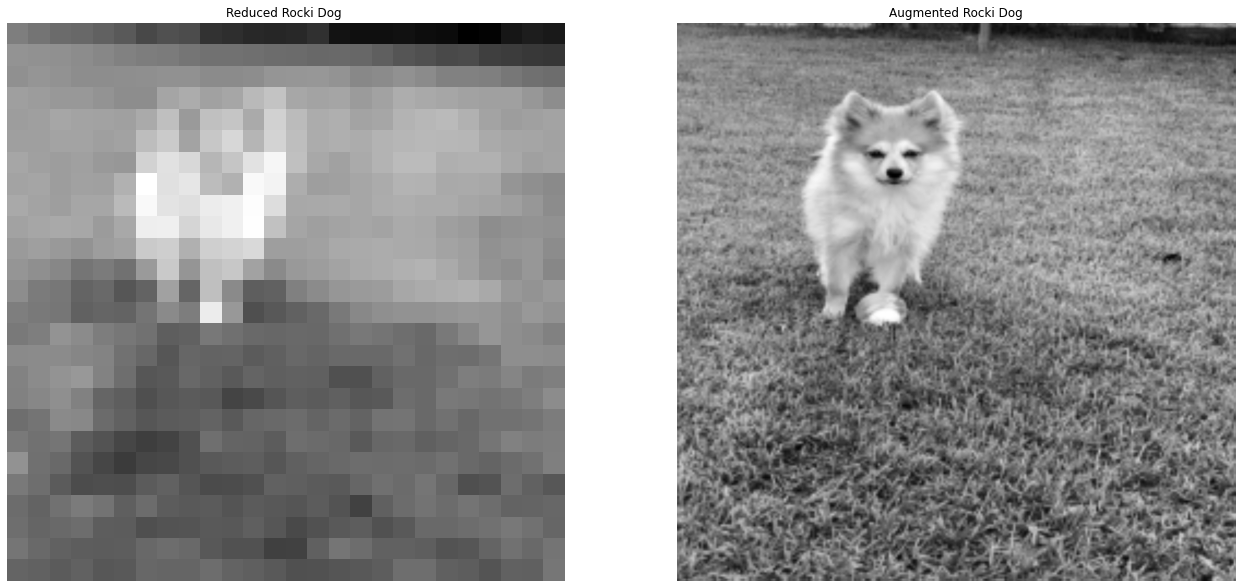

In [8]:
#your solution

def imageScale(nbins=32):
    ind = np.arange(nbins)
    fig=plt.figure(figsize=(20,10))

    # Reduce rocki_ray 10 times
    rockiR = rescale(rocki_gray, 0.1)
    hst_reduce, bins_reduce = histogram(rockiR, nbins)
    fig.add_subplot(1,2,1)
    plt.bar(ind, hst_reduce)
    plt.title(f'Reduced Rocki Dog histogram with {nbins} bins')

    # Augment rocki_gray 10 times
    rockiA = rescale(rocki_gray, 10)
    hst_augment, bins_augment = histogram(rockiA, nbins)
    fig.add_subplot(1,2,2)
    plt.bar(ind, hst_augment)
    plt.title(f'Augmented Rocki Dog histogram with {nbins} bins')

    plt.show()

    showImage((22,22), [rockiR, rockiA], ['Reduced Rocki Dog ', 'Augmented Rocki Dog'])
    
imageScale()

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

> We have three images with different histograms, we use the same mask, but we get different results. From observation of the results, the smaller the image, the more blurred it becomes. Also, the small image histograms are very scattered because there are few colors and the changes are abrupt. But if we apply the same mask to a larger image, the picture applies the smoothing action to fewer adjacent pixels, and they are less affected, so the histogram of the larger image seems to change almost nothing.

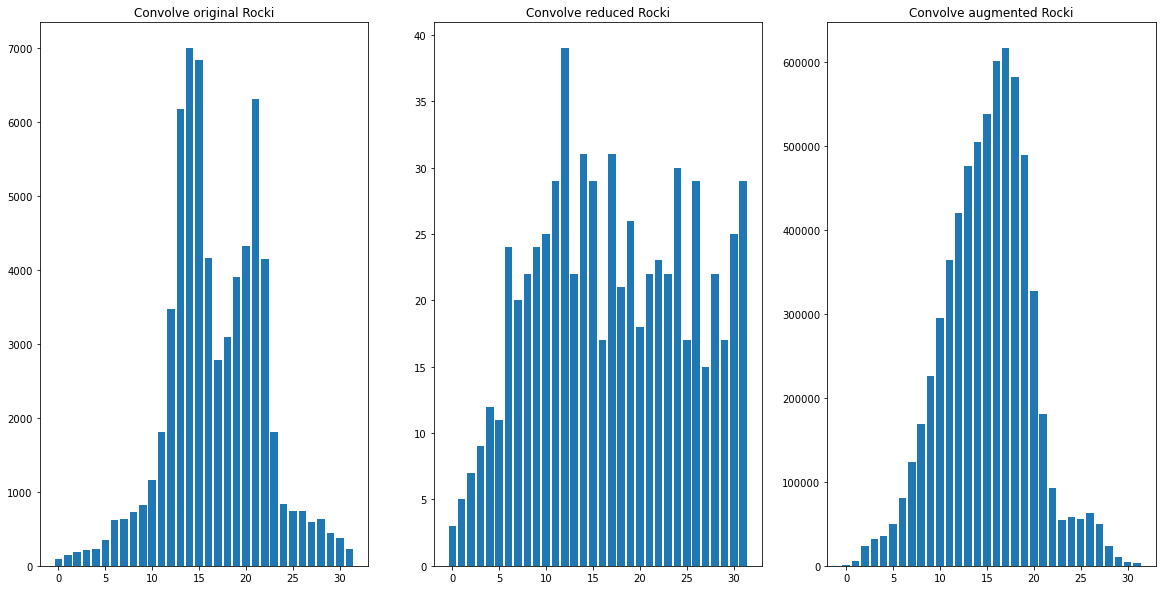

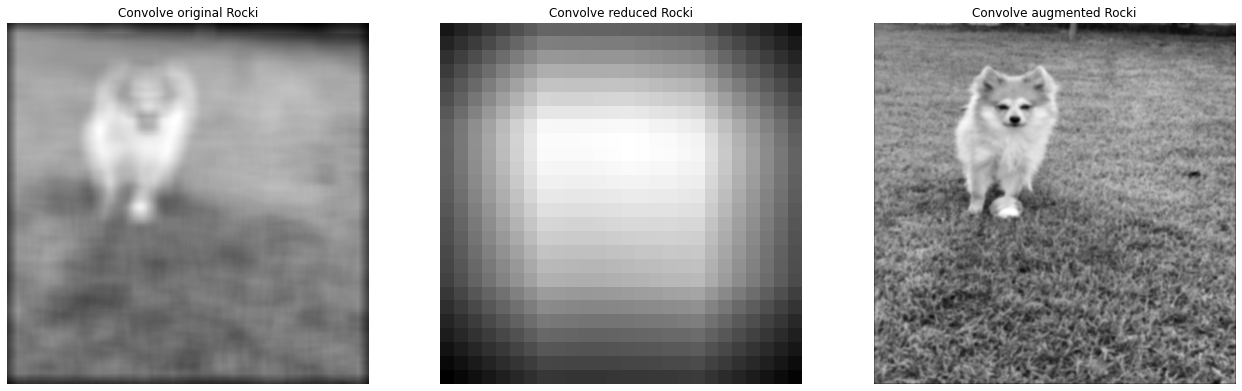

In [9]:
#your solution

# 15x15 uniform mask
mask = np.ones((15,15))
mask = mask/np.sum(mask)
nbins = 32

# resized images
rockiR = rescale(rocki_gray, 0.1)
rockiA = rescale(rocki_gray, 10)

ind = np.arange(nbins)
fig = plt.figure(figsize=(20,10))


# Convolve the original rocki_gray image
original_Rockie = convolve(rocki_gray, mask, mode='constant')
hst, bins = histogram(original_Rockie, nbins=nbins)
fig.add_subplot(1,3,1)
plt.bar(ind, hst)
plt.title('Convolve original Rocki')


# Convolve the reduced rocki_gray image 10 times
reduce_Rockie = convolve(rockiR, mask, mode='constant')
hst, bins = histogram(reduce_Rockie , nbins=nbins)
fig.add_subplot(1,3,2)
plt.bar(ind, hst)
plt.title('Convolve reduced Rocki')


# Convolve the augmented rocki_gray image 10 times 
augment_Rocki = convolve(rockiA, mask, mode='constant')
hst, bins = histogram(augment_Rocki, nbins=nbins)
fig.add_subplot(1,3,3)
plt.bar(ind, hst)
plt.title('Convolve augmented Rocki')

plt.show()


showImage((22,22), [original_Rockie, reduce_Rockie, augment_Rocki], ['Convolve original Rocki', 'Convolve reduced Rocki','Convolve augmented Rocki'])

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
   
   >  The most adequate value for keeping the main objects and structures od the image is using a smaller sigma of Gaussian filter or the median filter.

3. Median filter.

Comment the effect of using different kinds of filters on the original image.

> We used two types of filters: Gaussian filters and median filters with different sigmas. Using the median, we smooth the image keeping the original color. If a Gaussian function is used, we smooth the pixels according to sigma. That is, if the sigma is larger, the number of pixels affected is also larger.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

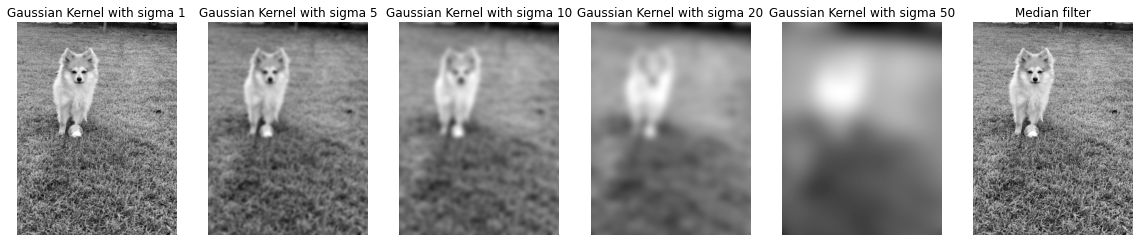

In [10]:
#your solution

# Gaussian kernel with sigma = 1
gs1 = gaussian(image_rocki_gray, sigma=1)

# Gaussian kernel with a different sigma value.
gs5 = gaussian(image_rocki_gray, sigma=5)
gs10 = gaussian(image_rocki_gray, sigma=10)
gs20 = gaussian(image_rocki_gray, sigma=20)
gs50 = gaussian(image_rocki_gray, sigma=50)

# Median filter
median_rocki = median(image_rocki_gray)

showImage((20,20),[gs1, gs5, gs10, gs20, gs50, median_rocki], 
          ['Gaussian Kernel with sigma 1', 'Gaussian Kernel with sigma 5', 'Gaussian Kernel with sigma 10', 'Gaussian Kernel with sigma 20', 'Gaussian Kernel with sigma 50', 'Median filter'])

b) **(Optional)** Apply the smoothing on some other images and present their results.

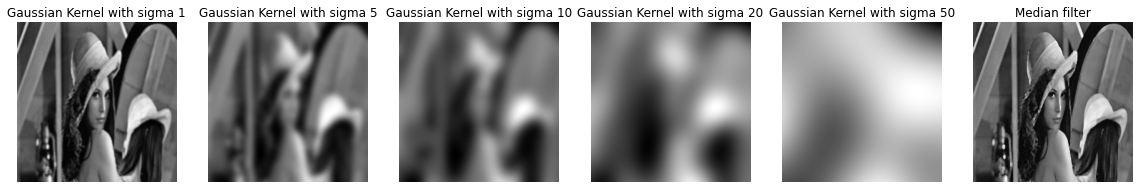

In [11]:
#your solution

# get image lenna
image_lenna = io.imread('./images_notebook/lenna.jpg')
image_lenna = resize(image_lenna,(256,256))
image_lenna_gray=rgb2gray(image_lenna)

# Gaussian kernel with sigma = 1
gs1 = gaussian(image_lenna_gray, sigma=1)

# Gaussian kernel with a different sigma value.
gs5 = gaussian(image_lenna_gray, sigma=5)
gs10 = gaussian(image_lenna_gray, sigma=10)
gs20 = gaussian(image_lenna_gray, sigma=20)
gs50 = gaussian(image_lenna_gray, sigma=50)

# Median filter
median_lenna = median(image_lenna_gray)


showImage((20,20), [gs1, gs5, gs10, gs20, gs50, median_lenna], 
            ['Gaussian Kernel with sigma 1', 'Gaussian Kernel with sigma 5', 'Gaussian Kernel with sigma 10', 'Gaussian Kernel with sigma 20', 'Gaussian Kernel with sigma 50', 'Median filter'])

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

>    Like the three pictures we see below, we can say that using Gaussian application and Canny algorithm is a better choice. Because we can see the Canny is clearer than the first and second.

- Which are the optimal parameters for this image? 

> The best parameter of the image is the canny algorithm, and through the canny algorithm, we can get a particularly neat picture.

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 
  
> Yes, we need to normalize the mask as we did when filtering the image, the result of the sum of the masks needs to be 0.

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

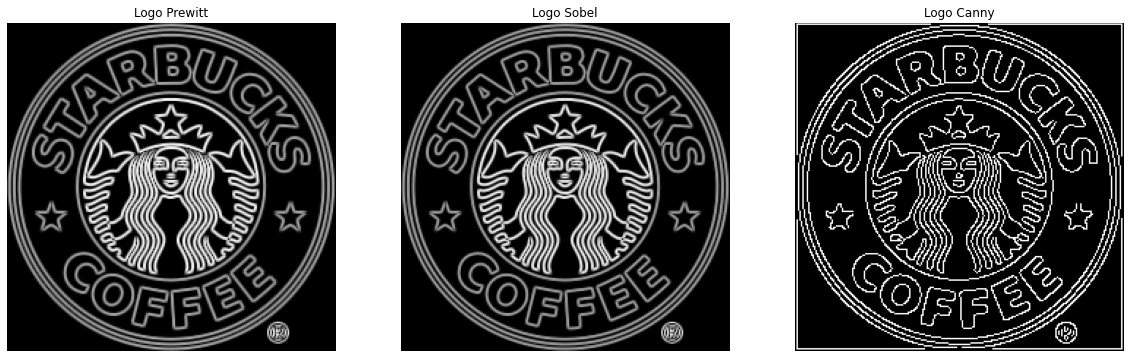

In [12]:
import warnings
warnings.filterwarnings("ignore")


image_logo = io.imread('./images_notebook/logo.png')
image_logo = rgba2rgb(image_logo)
image_logo_gray = rgb2gray(image_logo)

# apply filter with prewitt
logo_prewitt = filters.prewitt(image_logo_gray)

# apply filter with sobel
logo_sobel = filters.sobel(image_logo_gray)

# apply feature with canny
logo_canny = feature.canny(image_logo_gray)

showImage((20,20),[logo_prewitt,logo_sobel, logo_canny], ['Logo Prewitt', 'Logo Sobel', 'Logo Canny'])

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 

> Yes. If we smooth the image first, it will be sharp when we need the edges.

- Which are the limitations of the different images contour extraction?

> The limitation of contour extraction is that if there are two regions with the same color, but they are different things, then contour extraction may not detect it and the resulting image may not be what we want. So we will encounter the loss of information.

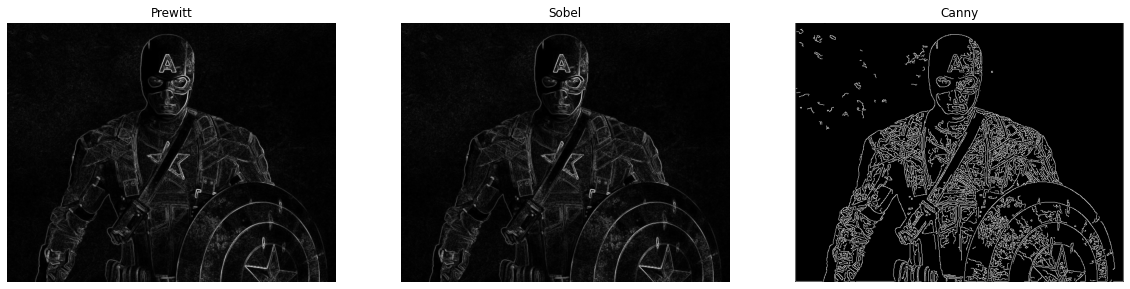

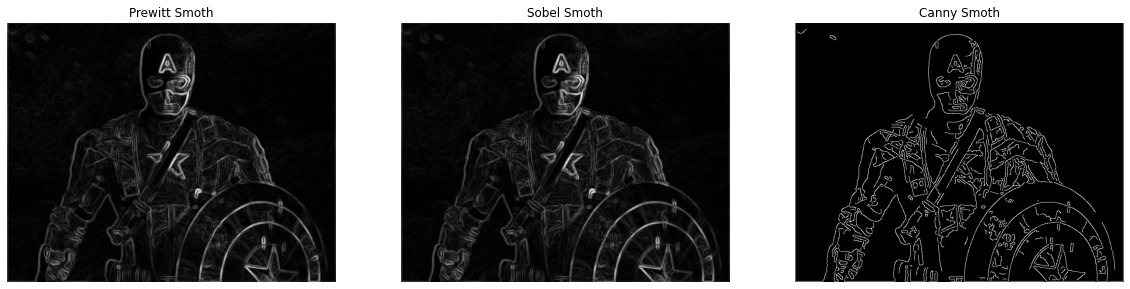

In [13]:
#your solution

# get image
capitanAmerica = io.imread('./images_notebook/Capitain_America.jpg')
capitanAmerica_gray = rgb2gray(capitanAmerica)

# apply different contour extraction 
capitanAmerica_prewitt = filters.prewitt(capitanAmerica_gray)
capitanAmerica_sobel = filters.sobel(capitanAmerica_gray)
capitanAmerica_canny = feature.canny(capitanAmerica_gray)

# apply different contour extraction  with mask
mask = np.ones((5,5))
mask = mask / np.sum(mask)
capitanAmerica_smoth = convolve(capitanAmerica_gray, mask, mode='constant')

capitanAmerica_prewitt_smoth = filters.prewitt(capitanAmerica_smoth)
capitanAmerica_sobel_smoth = filters.sobel(capitanAmerica_smoth)
capitanAmerica_canny_smoth = feature.canny(capitanAmerica_smoth)

# plot the images
showImage((20,20),[capitanAmerica_prewitt,capitanAmerica_sobel, capitanAmerica_canny], ['Prewitt', 'Sobel', 'Canny'])
showImage((20,20),[capitanAmerica_prewitt_smoth,capitanAmerica_sobel_smoth, capitanAmerica_canny_smoth], ['Prewitt Smoth', 'Sobel Smoth', 'Canny Smoth'])

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


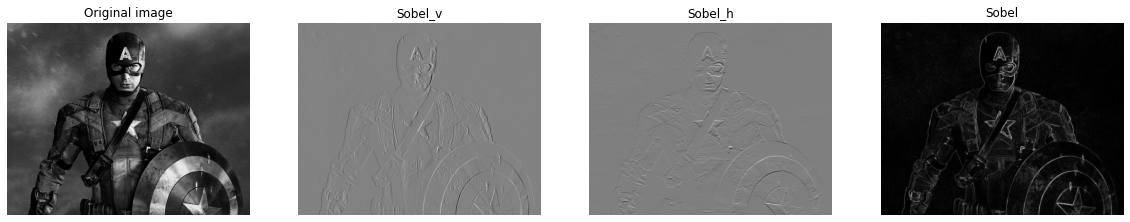

In [14]:
#your solution

# apply all possible Sobel
capitanAmerica_h = filters.sobel_h(capitanAmerica_gray)
capitanAmerica_v = filters.sobel_v(capitanAmerica_gray)
capitanAmerica_sobel  = filters.sobel(capitanAmerica_gray)

showImage((20,20),[capitanAmerica_gray,capitanAmerica_v, capitanAmerica_h, capitanAmerica_sobel], ['Original image', 'Sobel_v', 'Sobel_h', 'Sobel'])

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


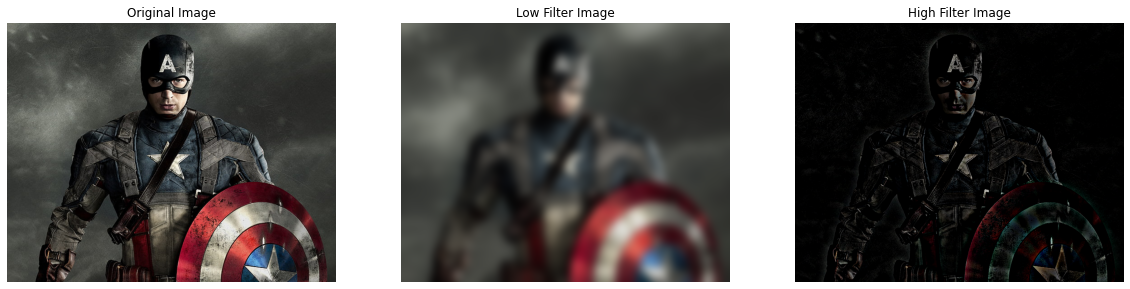

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


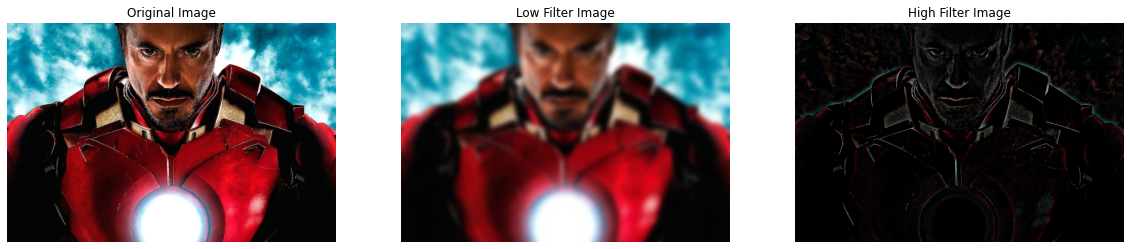

In [15]:
#your solution

# get image
capitanAmerica = io.imread('./images_notebook/Capitain_America.jpg')
ironMan = io.imread('./images_notebook/Ironman.jpg')

capitanAmericaFloat = img_as_float(capitanAmerica)
ironManFloat = img_as_float(ironMan)

# low filter image
capitanAmericaL = gaussian(capitanAmerica, sigma=10)
ironManL = gaussian(ironMan, sigma=10)

# hight filter image
capitanAmericaH = capitanAmericaFloat - capitanAmericaL
ironManH = ironManFloat - ironManL

showImage((20,20), [capitanAmerica, capitanAmericaL, capitanAmericaH], ['Original Image', 'Low Filter Image', 'High Filter Image'])
showImage((20,20), [ironMan, ironManL, ironManH], ['Original Image', 'Low Filter Image', 'High Filter Image'])

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
   
   >  If we want to see the ironman face, we use the high ironman and low captain image. 

2. Additionally, rescale the image to a different size and comment the results. 

    > We resize the image, as we can see that the larger the high pass image, the clearer it is.

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


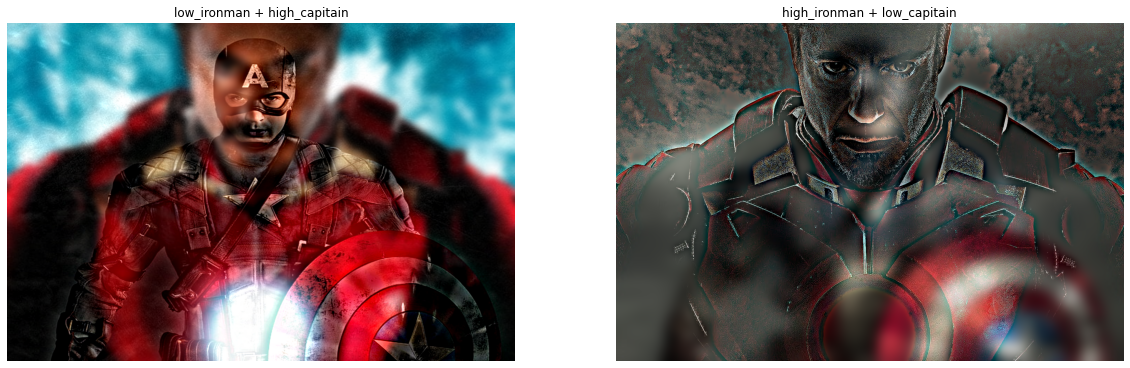

In [16]:
#your solution

# resize image to same shaepe
if ironManL.shape > capitanAmericaH.shape or ironManH.shape > capitanAmericaL.shape:
    capitanAmericaH = resize(capitanAmericaH, (ironManL.shape[0], ironManL.shape[1]))
    capitanAmericaL = resize(capitanAmericaL, (ironManH.shape[0], ironManH.shape[1]))
    
if ironManL.shape < capitanAmericaH.shape or ironManH.shape < capitanAmericaL.shape:
    ironManL = resize(ironManL, (capitanAmericaH.shape[0], capitanAmericaH.shape[1]))
    ironManH = resize(ironManH, (capitanAmericaL.shape[0], capitanAmericaL.shape[1]))
    
    
# create hybrid image
lowIronHighCap = ironManL + capitanAmericaH
highIronLowCap = ironManH + capitanAmericaL

showImage((20,20),[lowIronHighCap, highIronLowCap], ['low_ironman + high_capitain', 'high_ironman + low_capitain'])

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


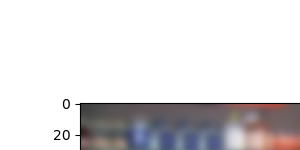

In [17]:

""""Showing one video per annimation"""

gaussian_images = []
ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')
for i in ic:    
    im_gaussian = gaussian(i, sigma=5)
    gaussian_images.append(im_gaussian)
    
# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(gaussian_images[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


In [18]:
import warnings
warnings.filterwarnings("ignore")